In [1]:
import sys; sys.path.append('..')
import random
from pyzx.graph import Graph
from pyzx.examples import cnots
from pyzx.simplify import phase_free_simp
from pyzx.drawing import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

Available backends: simple, igraph


In [70]:
random.seed(1000)
g = cnots(3,150)
#g.set_angle(56, 1)

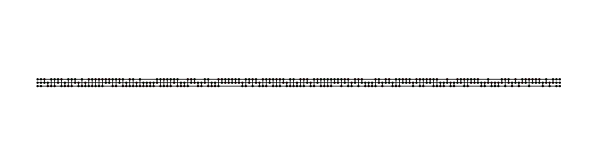

In [71]:
def draw(g, layout, labels=False, figsize=(8,2)):
    minX = 0
    minY = 0
    maxX = 1
    maxY = 1
    for _,p in layout.items():
        if p[0] < minX: minX = p[0]
        if p[0] > maxX: maxX = p[0]
        if p[1] < minY: minY = p[1]
        if p[1] > maxY: maxY = p[1]
    fig1 = plt.figure(figsize=figsize)
    ax = fig1.add_axes([0, 0, 1, 1], frameon=False)
    #ax = fig1.gca(aspect=1)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    for e in g.edges():
        sp = layout[g.edge_s(e)]
        tp = layout[g.edge_t(e)]
        ax.add_line(lines.Line2D([sp[0],tp[0]],[sp[1],tp[1]], color='black', linewidth=0.8, zorder=0))
        #plt.plot([sp[0],tp[0]],[sp[1],tp[1]], 'k', zorder=0, linewidth=0.8)
    
    for v in g.vertices():
        p = layout[v]
        t = g.get_type(v)
        a = g.get_angle(v)
        
        col = 'black'
        if t == 1: col = 'green'
        elif t == 2: col = 'red'
            
        ax.add_patch(patches.Circle(p, 0.2, facecolor=col, edgecolor='black', zorder=1))
        
        #plt.plot(p[0], p[1], 'o', color=col, markersize=4)
        if labels:
            plt.text(p[0], p[1]+0.3, str(v), ha='center', color='gray', fontsize=5)
        
        if a:
            plt.text(p[0], p[1]-0.7, angle_to_s(a), ha='center', color='blue', fontsize=8)
    
    ax.axis('equal')
    plt.show()
draw(g, layout=circuit_layout(g), labels=False)

In [72]:
phase_free_simp(g)
pack_circuit_nf(g, 'grg')

spider_simp
52. 39. 25. 26. 12. 8. 2. 1. 
finished in 9 iterations
bialg_simp
28. 14. 9. 5. 4. 2. 2. 2. 
finished in 9 iterations


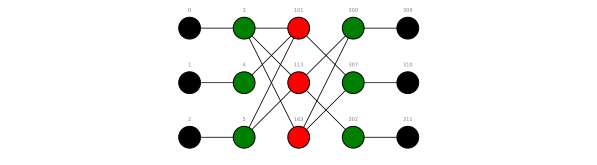

In [73]:
draw(g, layout=circuit_layout(g), labels=True)

In [36]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt